In [1]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)

scikit-learn version: 1.6.1
imbalanced-learn version: 0.13.0


In [37]:
import os
import pickle
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocesssing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from scipy.stats import norm
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

# Evaludation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import classification_report_imbalanced

# Load Data

In [3]:
df = pd.read_csv("creditcard.csv")
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
frequency = df["Class"].value_counts()
total = len(df["Class"])
display(frequency)
print("-" * 100)
print(f"Non-Fraud: {frequency[0]/total*100:.2f}%")
print(f"Fraud: {frequency[1]/total*100:.2f}%")

Class
0    284315
1       492
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------
Non-Fraud: 99.83%
Fraud: 0.17%


C:\Users\khais\AppData\Local\Temp\ipykernel_4152\1550478767.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = "Class", palette=["#0057B7", "#D30000"])


Text(0.5, 1.0, 'Class Distribution \n (0: Non-Fraud || 1: Fraud)')

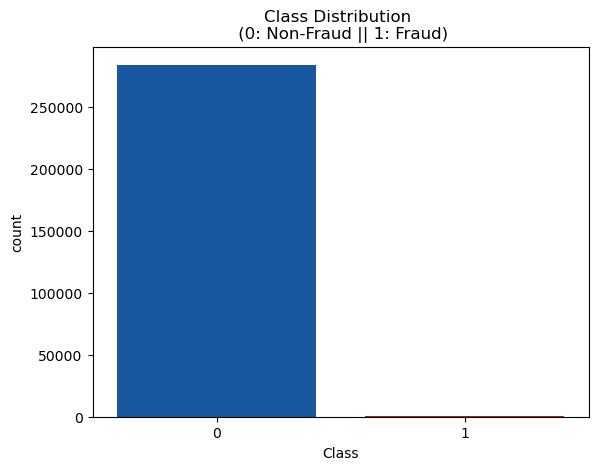

In [8]:
sns.countplot(df, x = "Class", palette=["#0057B7", "#D30000"])
plt.title("Class Distribution \n (0: Non-Fraud || 1: Fraud)")

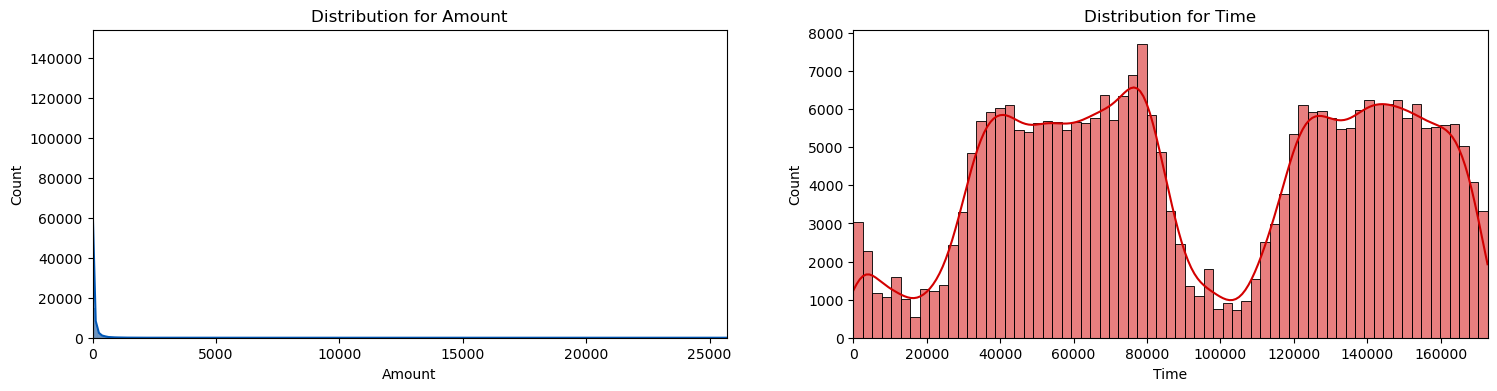

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (18, 4))

sns.histplot(df["Amount"], ax = ax[0], color="#0057B7", kde = True)
ax[0].set_title("Distribution for Amount")
ax[0].set_xlim([min(df["Amount"]), max(df["Amount"])])

sns.histplot(df["Time"], ax = ax[1], color="#D30000", kde = True)
ax[1].set_title("Distribution for Time")
ax[1].set_xlim([min(df["Time"]), max(df["Time"])])

plt.show()

# Data Proprocessing

In [10]:
scaler = RobustScaler()

scaled_amount = scaler.fit_transform(df[["Amount"]])
scaled_time = scaler.fit_transform(df[["Time"]])

df.drop(["Amount", "Time"], axis = 1, inplace = True)

In [11]:
df.insert(0, 'scaled_time', scaled_time)
df.insert(1, 'scaled_amount', scaled_amount)

df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [12]:
X = df.drop("Class", axis = 1)
y = df["Class"]

original_X_train, original_X_test, original_y_train, original_y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [13]:
train_fraud_count, train_non_fraud_count = original_y_train.value_counts()
test_fraud_count, test_non_fraud_count =  original_y_test.value_counts()

print("Data Distribution:")
print(f"Train: {train_fraud_count/len(original_y_train)*100:.2f}% || {train_non_fraud_count/len(original_y_train)*100:.2f}%")
print(f"Test: {test_fraud_count/len(original_y_test)*100:.2f}% || {test_non_fraud_count/len(original_y_test)*100:.2f}%")

Data Distribution:
Train: 99.83% || 0.17%
Test: 99.83% || 0.17%


In [14]:
df = df.sample(frac=1)

fraud_df = df.loc[df["Class"] == 1]
non_fraud_df = df.loc[df["Class"] == 0].sample(n = 492, random_state = 42)

balance_df = pd.concat([fraud_df, non_fraud_df])
balance_df = balance_df.sample(frac=1, random_state = 42)
balance_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
27139,-0.590726,0.136799,-1.439048,0.504438,1.771904,1.646017,-0.629675,1.062469,-0.513681,0.840391,...,-0.331077,-0.209299,-0.342835,0.096866,0.017341,-0.438699,-0.483906,-0.269431,0.107524,0
29687,-0.576922,-0.296793,-2.019001,1.491270,0.005222,0.817253,0.973252,-0.639268,-0.974073,-3.146929,...,-1.029965,2.839596,-1.185443,-0.142812,-0.086103,-0.329113,0.523601,0.626283,0.152440,1
149065,0.068669,1.979319,-0.106681,0.834544,-1.410527,-0.404927,0.423318,-0.300383,1.214389,-0.109552,...,-0.312796,0.058110,0.442168,0.101445,-0.061995,-0.656626,0.450019,-0.314082,-0.233320,0
150678,0.107931,0.116118,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,...,-1.376298,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,1
43160,-0.508641,3.507441,-14.970346,8.401421,-16.867238,8.252334,-13.565130,-2.782438,-14.263735,9.643419,...,-1.614660,2.714045,-0.101355,-0.439666,0.519514,0.789328,0.064357,-1.621386,-1.104819,1


# Data Visualisation

## Data Distribution

Data Distribution in balance dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


C:\Users\khais\AppData\Local\Temp\ipykernel_4152\4216843540.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(balance_df, x = "Class", palette=["#0057B7", "#D30000"])


Text(0.5, 1.0, 'Class Distribution \n (0: Non-Fraud || 1: Fraud)')

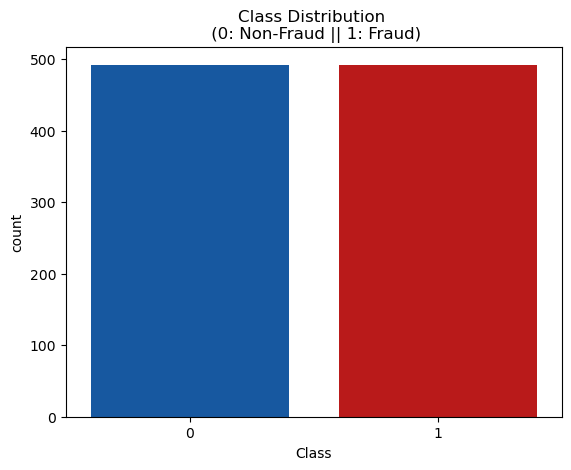

In [15]:
print("Data Distribution in balance dataset")
print(balance_df["Class"].value_counts()/len(balance_df))

sns.countplot(balance_df, x = "Class", palette=["#0057B7", "#D30000"])
plt.title("Class Distribution \n (0: Non-Fraud || 1: Fraud)")

## Correlation Matrix

Text(0.5, 1.0, 'Balanced Correlation Matrix')

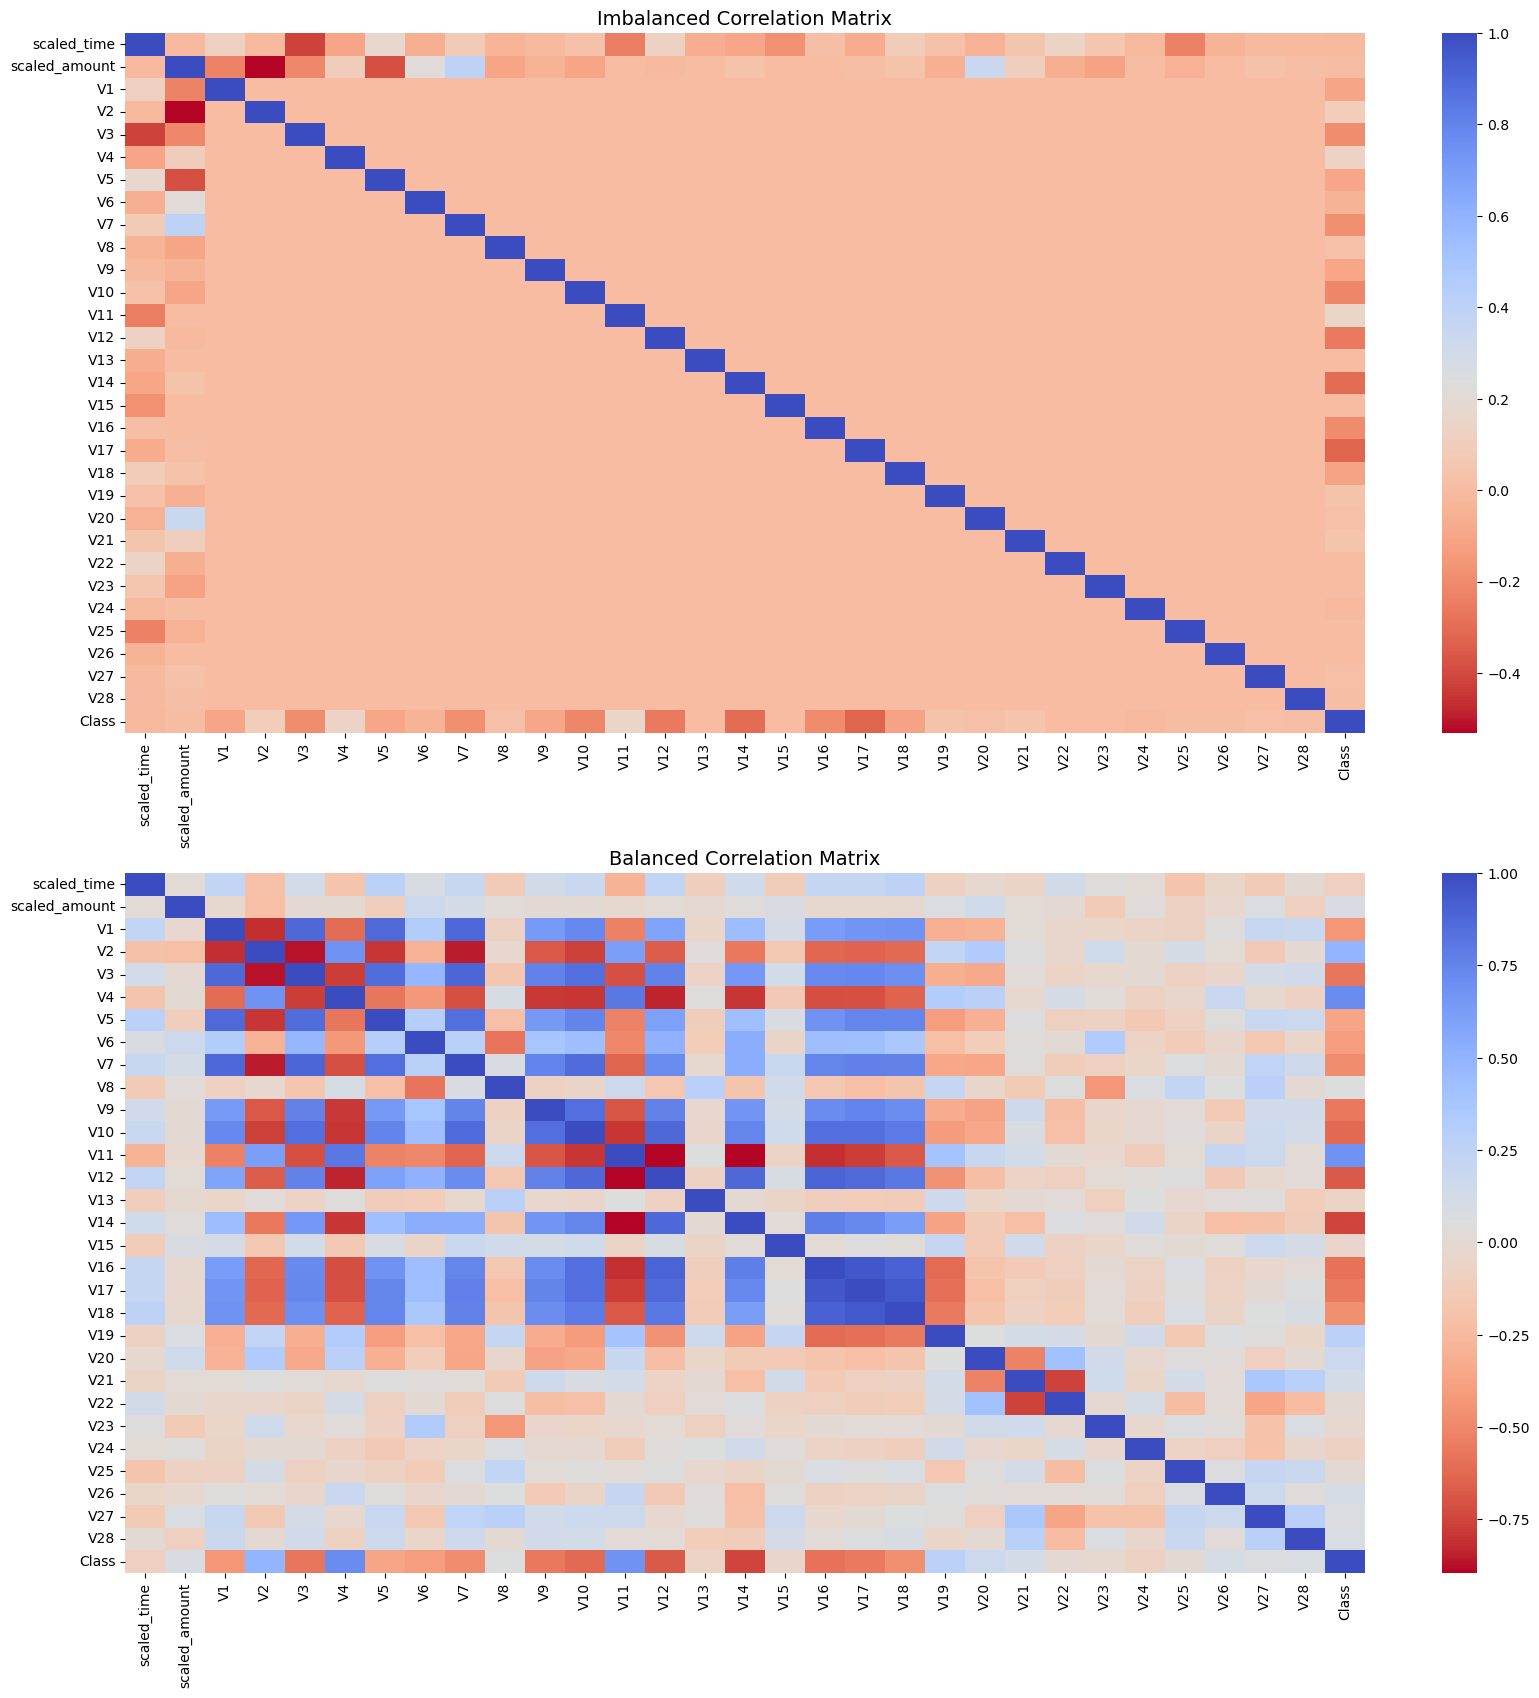

In [16]:
fig, ax = plt.subplots(2, 1, figsize = (20,20))

corr = df.corr()
sns.heatmap(corr, cmap = "coolwarm_r", annot_kws = {"size": 20}, ax = ax[0])
ax[0].set_title("Imbalanced Correlation Matrix", fontsize = 14)

balance_corr = balance_df.corr()
sns.heatmap(balance_corr, cmap = "coolwarm_r", annot_kws = {"size": 20}, ax = ax[1])
ax[1].set_title("Balanced Correlation Matrix", fontsize = 14)

## Box Plot

C:\Users\khais\AppData\Local\Temp\ipykernel_4152\3551899838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V14", palette = colors, ax = ax[0])
C:\Users\khais\AppData\Local\Temp\ipykernel_4152\3551899838.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V12", palette = colors, ax = ax[1])
C:\Users\khais\AppData\Local\Temp\ipykernel_4152\3551899838.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V10", palette = colors, ax 

Text(0.5, 1.0, 'V16 vs Class Negative Correlation')

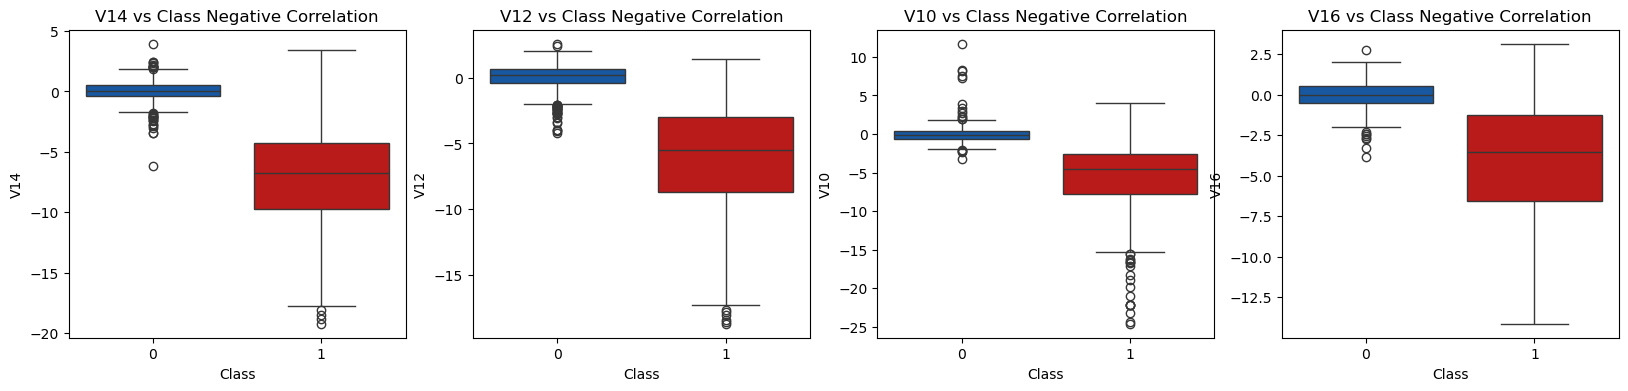

In [17]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))

colors = ["#0057B7", "#D30000"]
sns.boxplot(data = balance_df, x = "Class", y = "V14", palette = colors, ax = ax[0])
ax[0].set_title("V14 vs Class Negative Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V12", palette = colors, ax = ax[1])
ax[1].set_title("V12 vs Class Negative Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V10", palette = colors, ax = ax[2])
ax[2].set_title("V10 vs Class Negative Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V16", palette = colors, ax = ax[3])
ax[3].set_title("V16 vs Class Negative Correlation")

C:\Users\khais\AppData\Local\Temp\ipykernel_4152\1098575085.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V4", palette = colors, ax = ax[0])
C:\Users\khais\AppData\Local\Temp\ipykernel_4152\1098575085.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V11", palette = colors, ax = ax[1])
C:\Users\khais\AppData\Local\Temp\ipykernel_4152\1098575085.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V2", palette = colors, ax = 

Text(0.5, 1.0, 'V19 vs Class Positive Correlation')

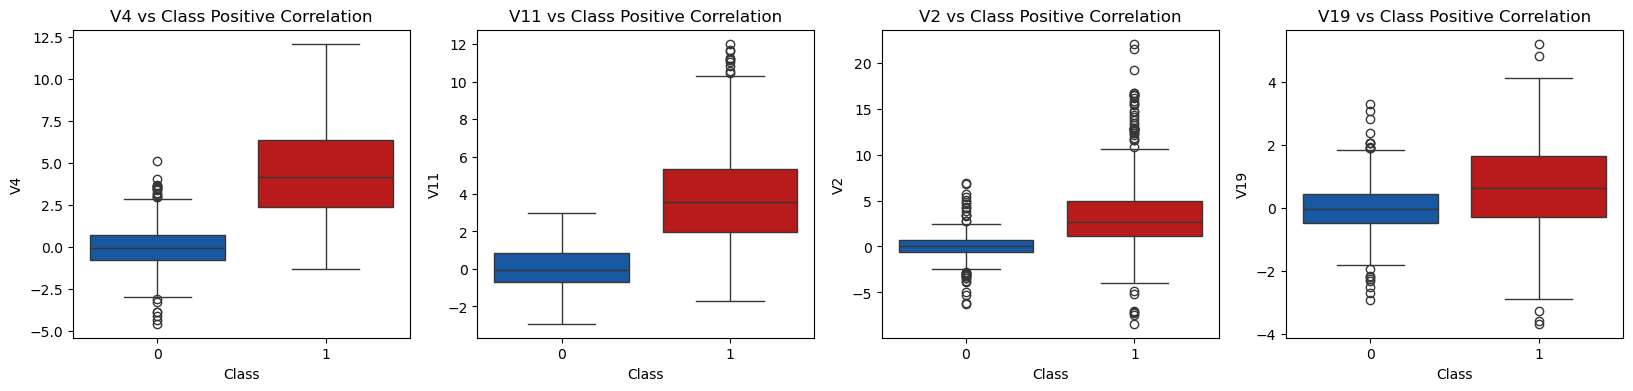

In [18]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))

colors = ["#0057B7", "#D30000"]
sns.boxplot(data = balance_df, x = "Class", y = "V4", palette = colors, ax = ax[0])
ax[0].set_title("V4 vs Class Positive Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V11", palette = colors, ax = ax[1])
ax[1].set_title("V11 vs Class Positive Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V2", palette = colors, ax = ax[2])
ax[2].set_title("V2 vs Class Positive Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V19", palette = colors, ax = ax[3])
ax[3].set_title("V19 vs Class Positive Correlation")

## Histogram

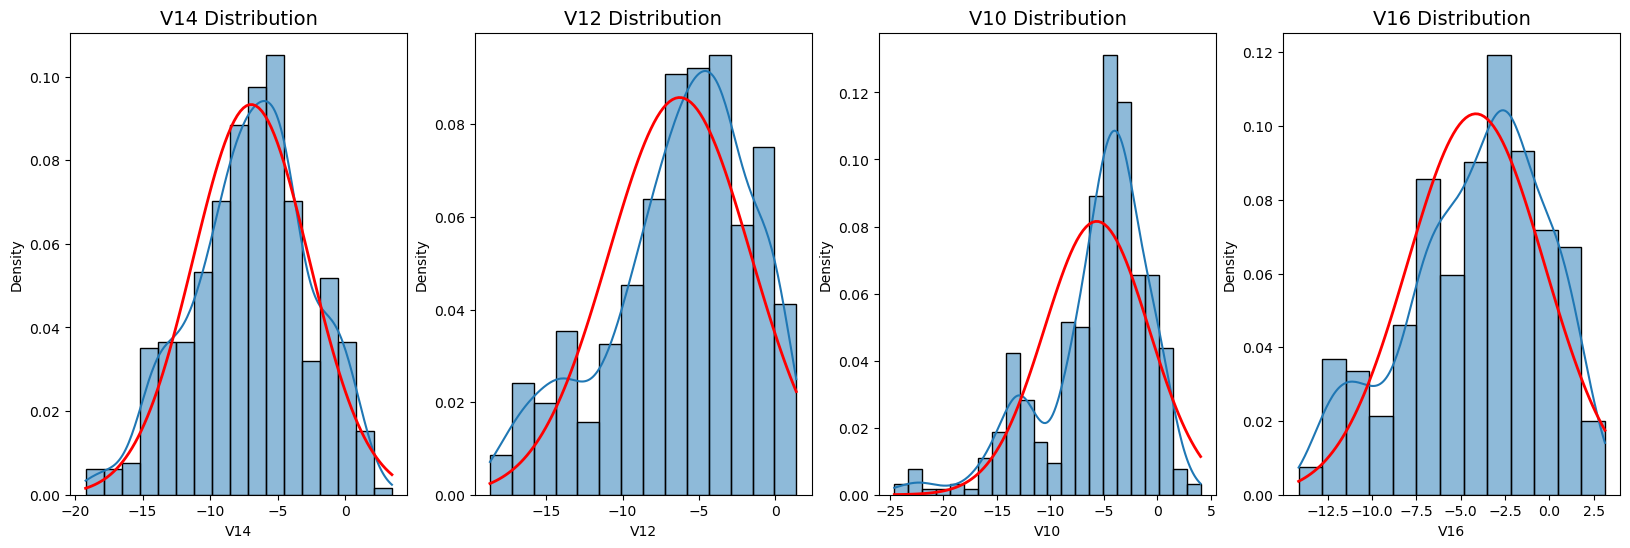

In [19]:
fig, ax = plt.subplots(1, 4, figsize = (20, 6))

features = ["V14", "V12", "V10", "V16"]
for i, feature in enumerate(features):

    fraud = balance_df[feature].loc[balance_df["Class"] == 1]
    sns.histplot(fraud, stat = "density", kde = True, ax = ax[i])
    
    # Fit normal distribution
    mu, std = norm.fit(fraud)
    x = np.linspace(min(fraud), max(fraud), 100)
    p = norm.pdf(x, mu, std)
    ax[i].plot(x, p, "r", linewidth = 2)
    ax[i].set_title(f"{feature} Distribution", fontsize = 14)

# Remove Outliers

In [20]:
features = ["V14", "V12", "V10"] # only V16 don't have outliers at Class = 1

for i, feature in enumerate(features):
    fraud = balance_df[feature].loc[balance_df["Class"] == 1]
    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    iqr = q75 - q25
    print(f"Q1: {q25: .2f}, Q3: {q75: .2f}, IQR: {iqr: .2f}")
    
    threshhold = iqr * 1.5
    lower, upper = q25 - threshhold, q75 + threshhold
    print(f"{feature} Lower Bound: {lower: .2f}, {feature} Upper Bound: {upper: .2f}")

    outliers = fraud[(fraud < lower) | (fraud > upper)]
    mask = ((balance_df["Class"] == 1) & (balance_df[feature] >= lower) & (balance_df[feature] <= upper))
    balance_df = balance_df[mask | (balance_df["Class"] == 0)]
    print(f"{feature} Outliers Count: {len(outliers)}")
    print("-" * 100)

Q1: -9.69, Q3: -4.28, IQR:  5.41
V14 Lower Bound: -17.81, V14 Upper Bound:  3.83
V14 Outliers Count: 4
----------------------------------------------------------------------------------------------------
Q1: -8.67, Q3: -2.89, IQR:  5.78
V12 Lower Bound: -17.34, V12 Upper Bound:  5.78
V12 Outliers Count: 4
----------------------------------------------------------------------------------------------------
Q1: -7.47, Q3: -2.51, IQR:  4.95
V10 Lower Bound: -14.90, V10 Upper Bound:  4.92
V10 Outliers Count: 27
----------------------------------------------------------------------------------------------------


## Box Plot after remove outliers

C:\Users\khais\AppData\Local\Temp\ipykernel_4152\2266513514.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V14", palette = colors, ax = ax[0])
C:\Users\khais\AppData\Local\Temp\ipykernel_4152\2266513514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V12", palette = colors, ax = ax[1])
C:\Users\khais\AppData\Local\Temp\ipykernel_4152\2266513514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V10", palette = colors, ax 

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

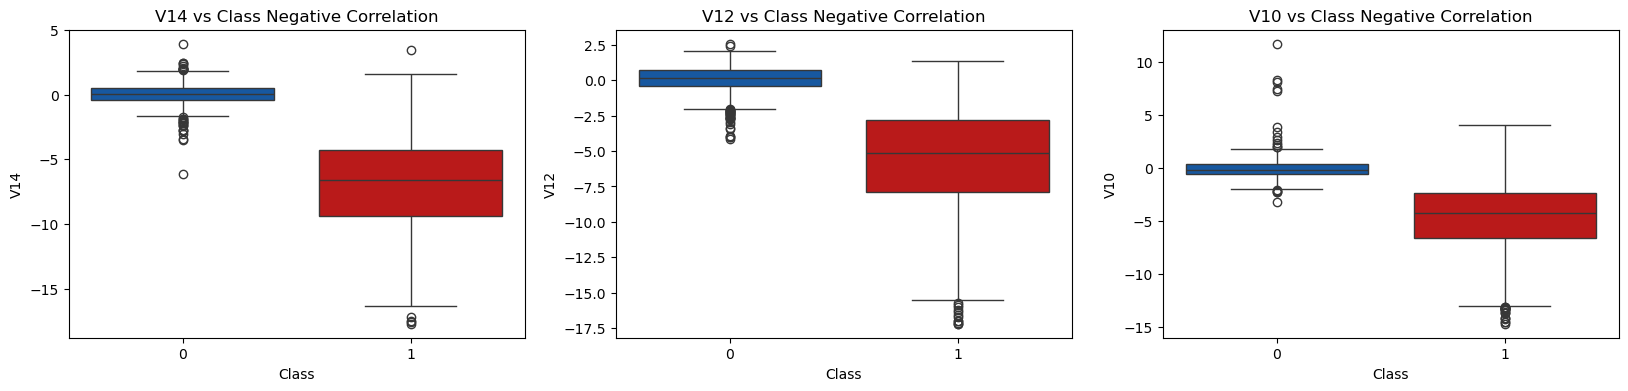

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (20, 4))

colors = ["#0057B7", "#D30000"]
sns.boxplot(data = balance_df, x = "Class", y = "V14", palette = colors, ax = ax[0])
ax[0].set_title("V14 vs Class Negative Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V12", palette = colors, ax = ax[1])
ax[1].set_title("V12 vs Class Negative Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V10", palette = colors, ax = ax[2])
ax[2].set_title("V10 vs Class Negative Correlation")

# Modelling

In [22]:
X = balance_df.drop("Class", axis = 1)
y = balance_df["Class"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

acc_before_grid = []
acc_after_grid = []

## Training Accuracy

In [25]:
print("Training Accuracy")
print("_" * 50)
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_scores = cross_val_score(classifier, X_train, y_train, cv = 5)
    acc_before_grid.append(f"{training_scores.mean() * 100: .2f}%")
    print(f"{key}: {training_scores.mean() * 100: .2f}%")

Training Accuracy
__________________________________________________
Logistic Regression:  93.15%
KNearest:  93.28%
Support Vector Classifier:  92.88%
Decision Tree:  89.20%
Random Forest:  93.41%
Gradient Boosting Classifier:  92.49%
AdaBoost:  92.89%


## Hyperparameter Tuning

In [26]:
parameters = {
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet"],
        "C": [0.01, 0.1, 1.0, 10, 100]
        # "solver": ["lbfgs", "liblinear", "sag", "saga"]
    },
    "KNearest": {
        "n_neighbors": list(range(2, 6, 1)),
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
        "p": [1, 2]
    },
    "Support Vector Classifier": {
        "C": [0.01, 0.1, 1.0, 10, 100],
        "kernel": ["linear", "poly", "rbf", "sigmoid"]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": list(range(2, 8, 1)),
        "min_samples_leaf": list(range(1, 9, 2))
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "criterion": ["gini", "entropy", "log_loss"],
        # "max_depth": list(range(2, 8, 1)),
        "min_samples_leaf": list(range(1, 7, 2)),
        # "max_features": ["sqrt", "log2"]
    },
    "Gradient Boosting Classifier": {
        "loss": ["log_loss", "exponential"],
        # "learning_rate": [0.01] +  list(np.arange(0.1, 0.3, 0.1)),
        "n_estimators": [50, 100, 200],
        "subsample": list(np.arange(0, 1.1, 0.2)),
        "criterion": ["friedman_mse", "squared_error"],
        # "max_depth": list(range(2, 8, 1)),
        "min_samples_leaf": list(range(1, 7, 2))
    },
    "AdaBoost": {
        "n_estimators": list(range(10, 110, 10)),
        "learning_rate": [0.01] +  list(np.arange(0.1, 0.4, 0.1))
    }
}

In [27]:
best_model = {}

for key in classifiers.keys():
    model_path = f"models/{key.replace(" ", "_")}.pkl"

    if os.path.exists(model_path):
        print(f"Load saved model for {key}")
        with open(model_path, "rb") as f:
            best_model[key] = pickle.load(f)
    else:
        print(f"Running GridSearchCV for {key}")
        grid_classifier = GridSearchCV(classifiers[key], parameters[key], n_jobs = -1, verbose = 1)
        grid_classifier.fit(X_train, y_train)
        best_model[key] = grid_classifier.best_estimator_

        os.makedirs("models", exist_ok = True)
        with open(model_path, "wb") as f:
            pickle.dump(best_model[key], f)
        print(f"Save {key} model to {model_path}")
    print("_" * 100)

Running GridSearchCV for Logistic Regression
Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Li

Save Logistic Regression model to models/Logistic_Regression.pkl
____________________________________________________________________________________________________
Running GridSearchCV for KNearest
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Save KNearest model to models/KNearest.pkl
____________________________________________________________________________________________________
Running GridSearchCV for Support Vector Classifier
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Save Support Vector Classifier model to models/Support_Vector_Classifier.pkl
____________________________________________________________________________________________________
Running GridSearchCV for Decision Tree
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Save Decision Tree model to models/Decision_Tree.pkl
____________________________________________________________________________________________________
Running GridSearchCV for Random Forest
Fitting 5

C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\khais\anaconda3\env

Save Gradient Boosting Classifier model to models/Gradient_Boosting_Classifier.pkl
____________________________________________________________________________________________________
Running GridSearchCV for AdaBoost
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Save AdaBoost model to models/AdaBoost.pkl
____________________________________________________________________________________________________


In [28]:
print("Training Accuracy")
print("_" * 50)
for key, classifier in classifiers.items():
    classifier = best_model[key]
    training_scores = cross_val_score(classifier, X_train, y_train, cv = 5)
    acc_after_grid.append(f"{training_scores.mean() * 100: .2f}%")
    print(f"{key}: {training_scores.mean() * 100: .2f}%")

Training Accuracy
__________________________________________________
Logistic Regression:  93.67%
KNearest:  93.67%
Support Vector Classifier:  93.67%
Decision Tree:  92.62%
Random Forest:  93.02%
Gradient Boosting Classifier:  93.67%
AdaBoost:  93.28%


In [38]:
X = df.drop("Class", axis = 1)
y = df["Class"]

original_X_train, original_X_test, original_y_train, original_y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)
skf = StratifiedKFold(n_splits = 5, random_state = None)

# X_nearmiss, y_nearmiss = NearMiss().fit_resample(X, y)
# print(f"NearMiss Label Distribution: {Counter(y_nearmiss)}")

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

for train_index, validation_index in skf.split(original_X_train, original_y_train):
    undersample_X_train, undersample_X_validation = original_X_train.iloc[train_index], original_X_train.iloc[validation_index]
    undersample_y_train, undersample_y_validation = original_y_train.iloc[train_index], original_y_train.iloc[validation_index]
    
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), best_model["Logistic Regression"])
    undersample_model = undersample_pipeline.fit(undersample_X_train, undersample_y_train)
    undersample_prediction = undersample_model.predict(undersample_X_validation)
    
    undersample_accuracy.append(undersample_pipeline.score(undersample_X_validation, undersample_y_validation))
    undersample_precision.append(precision_score(undersample_y_validation, undersample_prediction))
    undersample_recall.append(recall_score(undersample_y_validation, undersample_prediction))
    undersample_f1.append(f1_score(undersample_y_validation, undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_y_validation, undersample_prediction))

NearMiss Label Distribution: Counter({0: 492, 1: 492})
